In [33]:
import pandas as pd
import numpy as np


df = pd.read_csv("SSC Result Trends in Bangladesh (20012025).csv")


df['Total_Examinees'] = df['Total_Examinees'].replace('Null', np.nan)


df['Total_Examinees'] = df['Total_Examinees'].dropna().apply(lambda x: str(x).replace(',', ''))
df['Total_Examinees'] = pd.to_numeric(df['Total_Examinees'], errors='coerce')


df['GPA_5_Count'] = df['GPA_5_Count'].str.replace(',', '').astype(int)

df['Pass_Rate'] = df['Pass_Rate'].str.replace('%', '').astype(float)

print(df.head())


   Year  Total_Examinees  Pass_Rate  GPA_5_Count
0  2001              NaN      35.22           76
1  2002         784815.0      42.18          327
2  2003         921024.0      36.85         1389
3  2004         756387.0      50.27         8597
4  2005         944015.0      54.10        15631


In [34]:
df

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
0,2001,NaN,35.22,76
1,2002,784815.0,42.18,327
2,2003,921024.0,36.85,1389
3,2004,756387.0,50.27,8597
4,2005,944015.0,54.10,15631
5,2006,1000564.0,62.22,24384
6,2007,1024537.0,57.37,25732
7,2008,1013301.0,72.18,41917
8,2009,1420057.0,67.41,45934
9,2010,1206019.0,78.19,52134


In [35]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

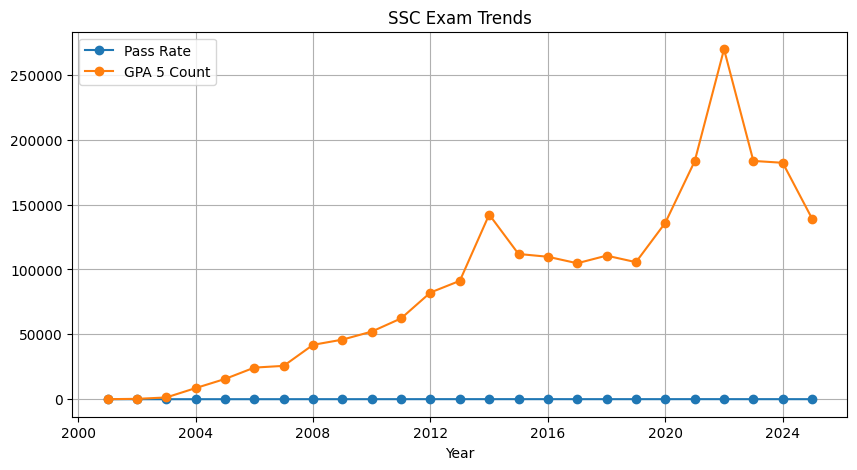

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Pass_Rate'], marker='o', label='Pass Rate')
plt.plot(df.index, df['GPA_5_Count'], marker='o', label='GPA 5 Count')
plt.title("SSC Exam Trends")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from prophet import Prophet


df_pass = df[['Pass_Rate']].reset_index().rename(columns={'Year': 'ds', 'Pass_Rate': 'y'})


model_pass = Prophet()
model_pass.fit(df_pass)


future_pass = model_pass.make_future_dataframe(periods=5, freq='Y')


forecast_pass = model_pass.predict(future_pass)


model_pass.plot(forecast_pass)
plt.title("Forecast: SSC Pass Rate")
plt.show()

In [44]:

gpa_data = df.reset_index()[['Year', 'GPA_5_Count']].rename(columns={'Year': 'ds', 'GPA_5_Count': 'y'})

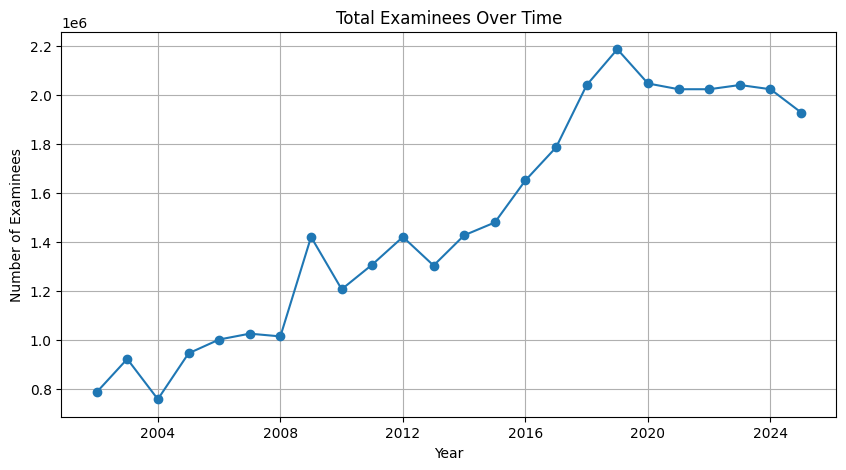

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Total_Examinees'], marker='o', linestyle='-')
plt.title("Total Examinees Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Examinees")
plt.grid(True)
plt.show()

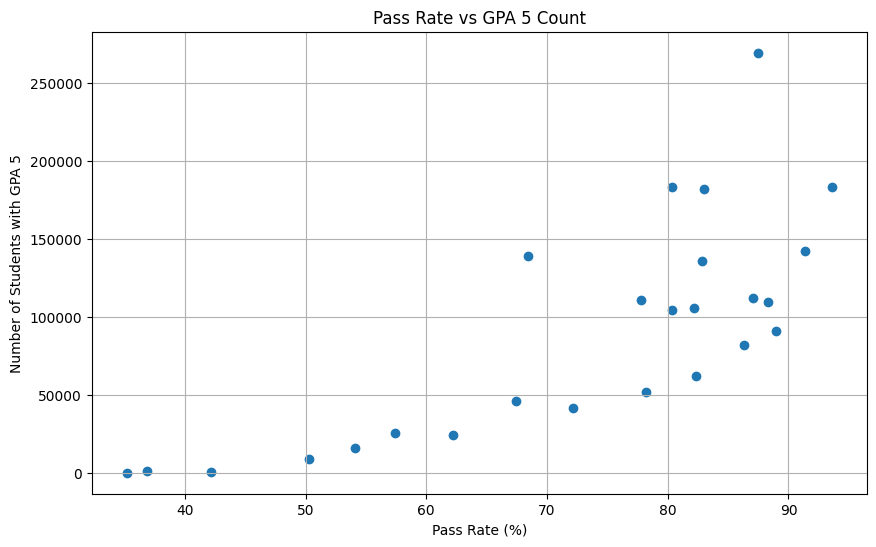

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Pass_Rate'], df['GPA_5_Count'])
plt.title("Pass Rate vs GPA 5 Count")
plt.xlabel("Pass Rate (%)")
plt.ylabel("Number of Students with GPA 5")
plt.grid(True)
plt.show()

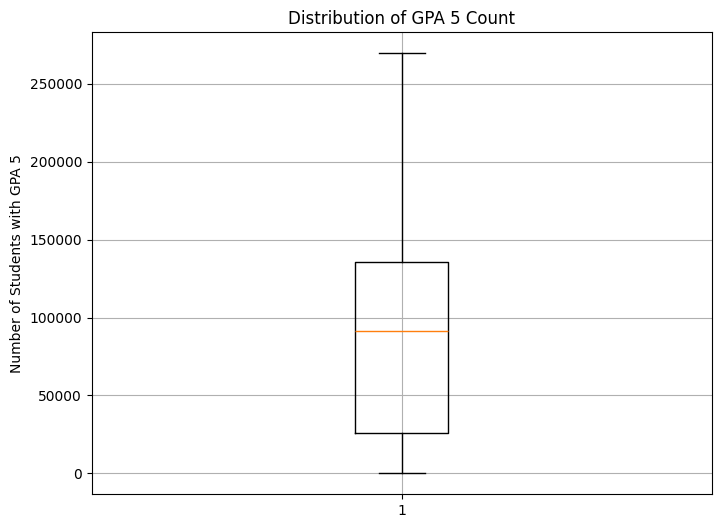

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['GPA_5_Count'])
plt.title("Distribution of GPA 5 Count")
plt.ylabel("Number of Students with GPA 5")
plt.grid(True)
plt.show()

In [42]:

correlation_matrix = df[['Total_Examinees', 'Pass_Rate', 'GPA_5_Count']].corr()


print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Total_Examinees  Pass_Rate  GPA_5_Count
Total_Examinees         1.000000   0.693005     0.854271
Pass_Rate               0.693005   1.000000     0.759157
GPA_5_Count             0.854271   0.759157     1.000000


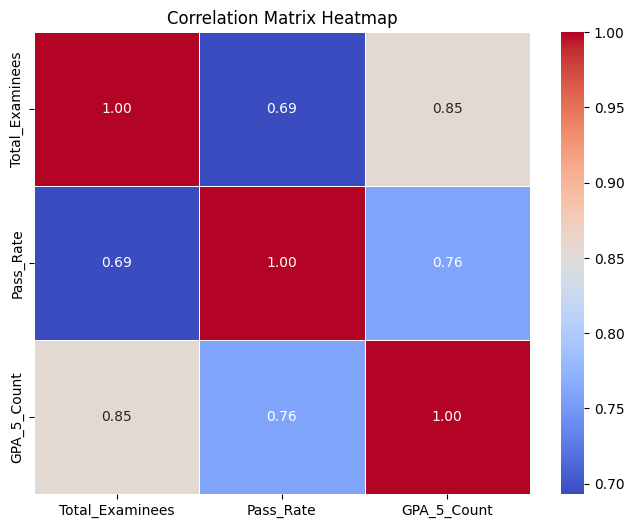

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()